<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [5]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [6]:
# Explore the shape of the data
df.shape

(985, 12)

In [7]:
# Explore the dataset
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [8]:
#Check datatype and Null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
# Zip Code is category variables. Convert zip to category variable
df['zip'] = df['zip'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    object  
 2   zip        985 non-null    category
 3   state      985 non-null    object  
 4   beds       985 non-null    int64   
 5   baths      985 non-null    int64   
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    object  
 8   sale_date  985 non-null    object  
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 88.3+ KB


In [10]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [11]:
# Explore Category variable (city). 
city = df['city'].value_counts()
city

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: count, dtype: int64

In [12]:
# Explore Category Variable (zip)
zip = df['zip'].value_counts()
zip

zip
95648    72
95823    61
95828    45
95758    44
95835    37
         ..
95633     1
95631     1
95619     1
95614     1
95663     1
Name: count, Length: 68, dtype: int64

In [13]:
# Explore Category variable (state). 
state = df['state'].value_counts()
state

state
CA    985
Name: count, dtype: int64

In [14]:
# Explore Category variable (type). 
type = df['type'].value_counts()
type

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why? Price is the target variable as we need to predict the price

In [29]:
# ANSWER
# Price is the target variable as we need to predict the price

#### 2.2 List all possible variables which might be Predictor variable.

In [31]:
# ANSWER
# Possible Predictor Variables = city, zip, beds, baths, sq_ft, type
predictor = df[["city", "zip", "beds", "baths", "sq__ft", "type"]]
predictor

,city,zip,beds,baths,sq__ft,type
0,SACRAMENTO,95838,2,1,836,Residential
1,SACRAMENTO,95823,3,1,1167,Residential
2,SACRAMENTO,95815,2,1,796,Residential
3,SACRAMENTO,95815,2,1,852,Residential
4,SACRAMENTO,95824,2,1,797,Residential
...,...,...,...,...,...,...
980,SACRAMENTO,95829,4,3,2280,Residential
981,SACRAMENTO,95823,3,2,1477,Residential
982,CITRUS HEIGHTS,95610,3,2,1216,Residential
983,ELK GROVE,95758,4,2,1685,Residential


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [33]:
# Define function to draw the scatter plot
def draw_scatter_plot(x,y):
    plt.figure(figsize = (10,6)) # create a new figure with specified size
    plt.scatter(x, y, color = 'b', marker='o', alpha=0.7, s=50)
    plt.tight_layout()
    plt.show()

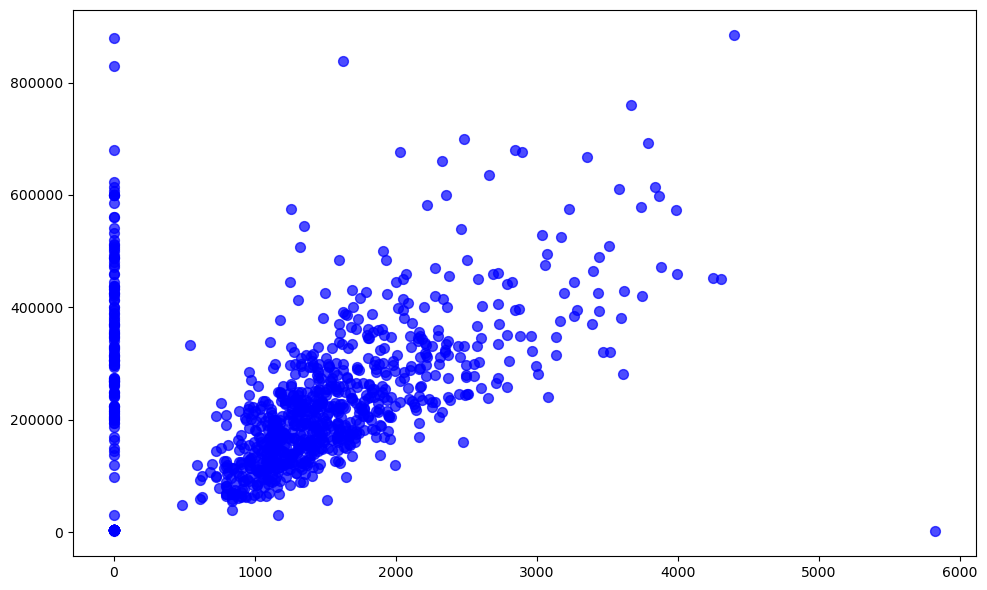

In [34]:
# Try Visualize "sq__ft" vs "Price"
draw_scatter_plot(df['sq__ft'], df['price'])

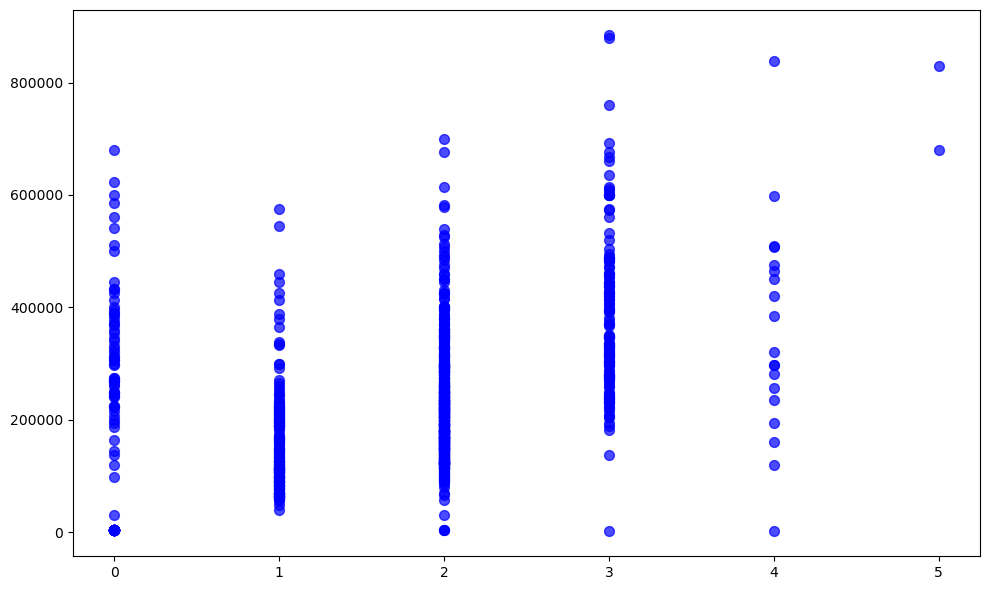

In [35]:
# Try Visualize "baths" vs "Price"
draw_scatter_plot(df['baths'], df['price'])

In [36]:
# ANSWER
correlation_matrix = df.corr(numeric_only=True) # numeric_only=True ensures only numerical columns are used

print("\nCorrelation Matrix:")
print(correlation_matrix)
print("-" * 50)


Correlation Matrix:
               beds     baths    sq__ft     price  latitude  longitude
beds       1.000000  0.839650  0.684041  0.342024 -0.291307  -0.053993
baths      0.839650  1.000000  0.665690  0.416208 -0.235792   0.016582
sq__ft     0.684041  0.665690  1.000000  0.333897 -0.383274  -0.177742
price      0.342024  0.416208  0.333897  1.000000 -0.039573   0.284485
latitude  -0.291307 -0.235792 -0.383274 -0.039573  1.000000   0.387925
longitude -0.053993  0.016582 -0.177742  0.284485  0.387925   1.000000
--------------------------------------------------


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [38]:
# ANSWER
df['y_mean'] = np.mean(df['price'])
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


In [41]:
x= df['sq__ft']
y = df['price']
Ymean = np.mean(df['y_mean'])

In [43]:
def draw_plot(X, Y, Ymean):
    plt.figure(figsize = (10,6)) # create a new figure with specified size
    plt.scatter(X, Y, color = 'b', marker='o', alpha=0.7, s=50)
    plt.axhline(y = Ymean, color = 'r', linestyle='--')
    plt.tight_layout()
    plt.show()

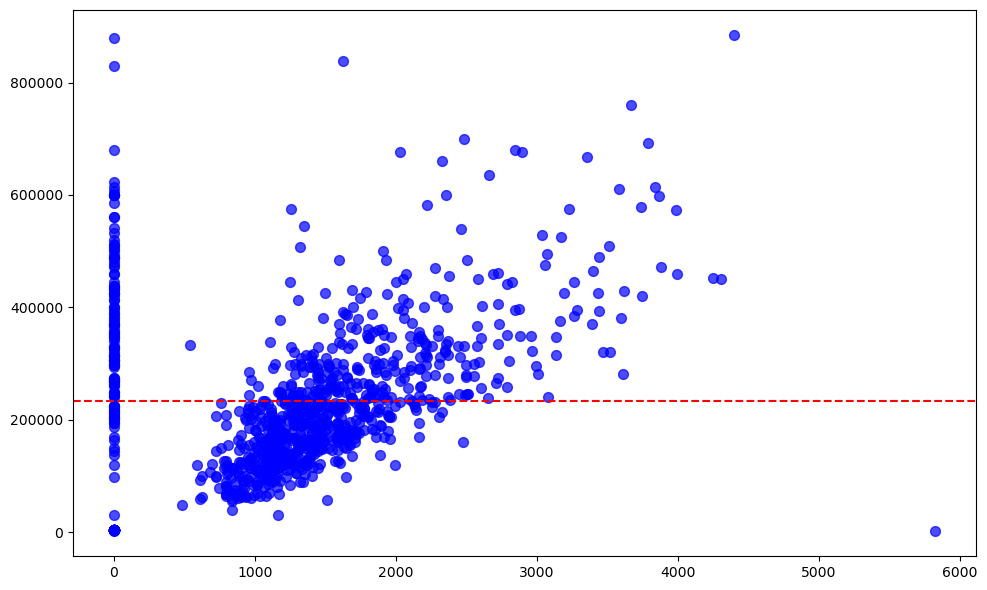

In [45]:
draw_plot(x,y,Ymean)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [53]:
# ANSWER
res = abs(df['price'] - df['y_mean'])
res

0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [57]:
# ANSWER
# Predictor
X = df["sq__ft"]
# Target Variable
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [60]:
# ANSWER
def callable_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    n = np.sum((Y-Ybar)*(X-Xbar))
    d = np.sum((X-Xbar) ** 2)

    beta_1 = n/d
    return beta_1

In [62]:
beta_1 = callable_beta_1(X,Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [66]:
# ANSWER
def callable_beta_0(X, Y, beta_1):
    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - beta_1 * Xbar

    return beta_0

In [68]:
beta_0 = callable_beta_0(X,Y, beta_1)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [72]:
# ANSWER
def callable_yhat(X, b0, b1):
    yhat = b0+b1*X
    return yhat

In [74]:
yhat = callable_yhat(X, beta_0, beta_1)
yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [78]:
# ANSWER
def callable_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [80]:
callable_residual(Y,yhat)

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{tot} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Squared value.**

In [83]:
# Define function for total sum of square, SStot
def callable_total_sum_of_square(Y):
    Ybar = Y.mean()
    SStot = np.square(Y - Ybar)
    sstot = np.sum(SStot)
    return sstot

In [85]:
callable_total_sum_of_square(Y)

18838783738865.37

In [87]:
# Define function for residual sum of square, SSres
def callable_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y-Yhat)
    SSres = np.sum(SSres)
    return SSres

In [89]:
callable_residual_sum_of_square(Y, yhat)

16738500924917.504

In [91]:
# Define function for R-square, R**2
def callable_r_squared(Y, Yhat):
    SStot = callable_total_sum_of_square(Y)
    SSres = callable_residual_sum_of_square(Y, Yhat)

    r_squared = 1 - (SSres/SStot)
    return r_squared

In [93]:
callable_r_squared(Y, yhat)

0.11148717682951459

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [97]:
# ANSWER
def draw_plot_predicted (X, Y, yhat):
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color = 'g', marker='o', alpha=0.7, s=50)
    sorted_indices = np.argsort(X)
    X_plot_line = X[sorted_indices]
    Y_predicted_plot_line = yhat[sorted_indices]
    plt.plot(X_plot_line, Y_predicted_plot_line,
             color= 'r',
             linestyle='--')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

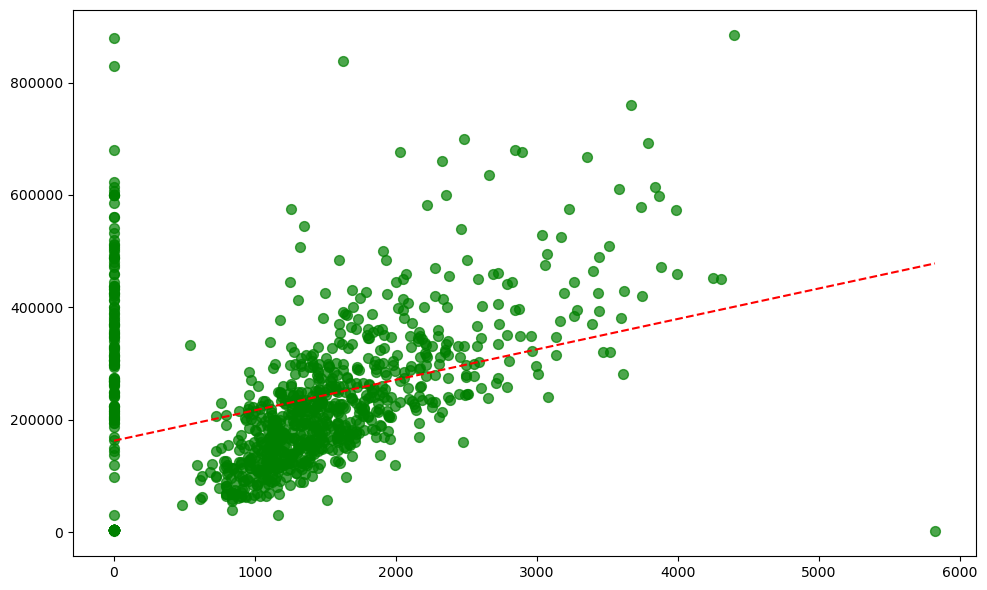

In [99]:
draw_plot_predicted(X,Y,yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [102]:
# ANSWER
# create a figure
def draw_plot_predicted_residual(X, Y, yhat):
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color = 'g', marker='o', alpha=0.7, s=50)
    sorted_indices = np.argsort(X)
    X_plot_line = X[sorted_indices]
    Y_predicted_plot_line = yhat[sorted_indices]
    plt.plot(X_plot_line, Y_predicted_plot_line,
             color= 'r',
             linestyle='--')
    plt.scatter([], [], color= 'Pink' , linestyle= '--')
    for i in range(len(X)):
        x_val = X[i]
        y_actual_val = Y[i]
        y_predicted_val = yhat[i]

        plt.plot([x_val, x_val], [y_actual_val, y_predicted_val], # Draw vertical line
                 color= 'orange',
                 linestyle='--',
                 alpha=0.7) # Apply some transparency for better visualization
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

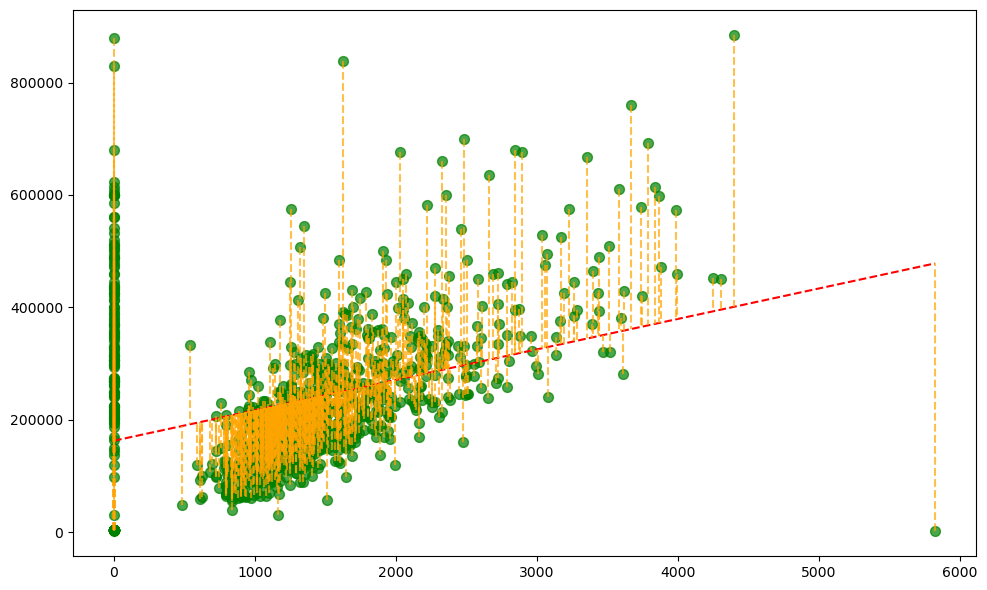

In [104]:
draw_plot_predicted_residual(X,Y,yhat)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [107]:
# ANSWER
xpred = 1204
xpred

1204

In [109]:
beta_0

162930.16140699777

In [111]:
beta_1

54.158639688530755

In [113]:
ypred = beta_1 * xpred + beta_0
ypred

228137.1635919888



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



